# 6.1.4 Generate Random Latitudes and Longitudes

### Create Latitude and Longitude Combinations

In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

# 6.1.5 Generate Random World Cities

In [4]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

# 6.2.6 Get the City Weather Data

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mersing
Processing Record 2 of Set 1 | svetlogorsk
Processing Record 3 of Set 1 | juli
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | kiama
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | thinadhoo
Processing Record 8 of Set 1 | petropavlovsk-kamchatskiy
Processing Record 9 of Set 1 | airai
Processing Record 10 of Set 1 | solvychegodsk
Processing Record 11 of Set 1 | cangzhou
Processing Record 12 of Set 1 | ust-kuyga
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | roanoke rapids
Processing Record 15 of Set 1 | haapiti
Processing Record 16 of Set 1 | pevek
Processing Record 17 of Set 1 | dikson
Processing Record 18 of Set 1 | vardo
Processing Record 19 of Set 1 | san cristobal
Processing Record 20 of Set 1 | toliary
City not found. Skipping...
Processing Record 21 of Set 1 | lagoa
Processing Record 22 of Set 1 | puerto del ros

Processing Record 36 of Set 4 | mao
Processing Record 37 of Set 4 | yaan
Processing Record 38 of Set 4 | lavrentiya
Processing Record 39 of Set 4 | morros
Processing Record 40 of Set 4 | maine-soroa
Processing Record 41 of Set 4 | cabinda
Processing Record 42 of Set 4 | kracheh
City not found. Skipping...
Processing Record 43 of Set 4 | el uvito
Processing Record 44 of Set 4 | qaanaaq
Processing Record 45 of Set 4 | katsuura
Processing Record 46 of Set 4 | chokurdakh
Processing Record 47 of Set 4 | port blair
Processing Record 48 of Set 4 | tuatapere
Processing Record 49 of Set 4 | poum
Processing Record 50 of Set 4 | high prairie
Processing Record 1 of Set 5 | shimoda
Processing Record 2 of Set 5 | provideniya
Processing Record 3 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 4 of Set 5 | balykshi
City not found. Skipping...
Processing Record 5 of Set 5 | tarko-sale
Processing Record 6 of Set 5 | hasaki
Processing Record 7 of Set 5 | kushmurun
Processing Record 8

City not found. Skipping...
Processing Record 25 of Set 8 | bambous virieux
Processing Record 26 of Set 8 | gimli
Processing Record 27 of Set 8 | ulaangom
Processing Record 28 of Set 8 | umm kaddadah
Processing Record 29 of Set 8 | tachi
City not found. Skipping...
Processing Record 30 of Set 8 | rodrigues alves
Processing Record 31 of Set 8 | saint-francois
Processing Record 32 of Set 8 | san andres
Processing Record 33 of Set 8 | igarka
Processing Record 34 of Set 8 | surok
Processing Record 35 of Set 8 | takapau
Processing Record 36 of Set 8 | avera
Processing Record 37 of Set 8 | cap-aux-meules
Processing Record 38 of Set 8 | fare
Processing Record 39 of Set 8 | adrar
Processing Record 40 of Set 8 | mys shmidta
City not found. Skipping...
Processing Record 41 of Set 8 | lekoni
Processing Record 42 of Set 8 | quelimane
Processing Record 43 of Set 8 | alotau
City not found. Skipping...
Processing Record 44 of Set 8 | hami
Processing Record 45 of Set 8 | asau
Processing Record 46 of S

Processing Record 13 of Set 12 | conakry
Processing Record 14 of Set 12 | gerash
Processing Record 15 of Set 12 | lakes entrance
Processing Record 16 of Set 12 | skalistyy
City not found. Skipping...
Processing Record 17 of Set 12 | bouloupari
Processing Record 18 of Set 12 | lodja
Processing Record 19 of Set 12 | lar
Processing Record 20 of Set 12 | agirish
Processing Record 21 of Set 12 | shache
Processing Record 22 of Set 12 | caledon
Processing Record 23 of Set 12 | canico
Processing Record 24 of Set 12 | bose
Processing Record 25 of Set 12 | meulaboh
Processing Record 26 of Set 12 | hailun
Processing Record 27 of Set 12 | kegayli
City not found. Skipping...
Processing Record 28 of Set 12 | deh rawud
City not found. Skipping...
Processing Record 29 of Set 12 | eskasem
City not found. Skipping...
Processing Record 30 of Set 12 | satipo
Processing Record 31 of Set 12 | klaksvik
Processing Record 32 of Set 12 | opochka
Processing Record 33 of Set 12 | anloga
Processing Record 34 of Se

In [9]:
len(city_data)

553

# 6.2.7 Create a DataFrame of City Weather Data

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mersing,2.43,103.84,77.00,88,20,3.36,MY,2020-10-04 00:40:09
1,Svetlogorsk,52.63,29.73,56.88,73,86,13.58,BY,2020-10-04 00:40:09
2,Juli,-16.22,-69.45,44.67,72,0,6.96,PE,2020-10-04 00:40:09
3,Ushuaia,-54.80,-68.30,42.80,70,40,7.27,AR,2020-10-04 00:40:09
4,Kiama,-34.68,150.87,78.01,61,52,8.01,AU,2020-10-04 00:40:09
5,Vaini,-21.20,-175.20,75.20,94,90,11.41,TO,2020-10-04 00:40:09
6,Thinadhoo,0.53,72.93,83.07,70,100,6.42,MV,2020-10-04 00:40:09
7,Petropavlovsk-Kamchatskiy,53.05,158.65,48.20,66,1,2.24,RU,2020-10-04 00:40:09
8,Airai,-8.93,125.41,75.63,39,89,4.12,TL,2020-10-04 00:40:09
9,Solvychegodsk,61.33,46.92,32.68,95,0,3.24,RU,2020-10-04 00:40:09


In [11]:
city_data_new_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [12]:
city_data_df = city_data_df[city_data_new_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mersing,MY,2020-10-04 00:40:09,2.43,103.84,77.00,88,20,3.36
1,Svetlogorsk,BY,2020-10-04 00:40:09,52.63,29.73,56.88,73,86,13.58
2,Juli,PE,2020-10-04 00:40:09,-16.22,-69.45,44.67,72,0,6.96
3,Ushuaia,AR,2020-10-04 00:40:09,-54.80,-68.30,42.80,70,40,7.27
4,Kiama,AU,2020-10-04 00:40:09,-34.68,150.87,78.01,61,52,8.01
...,...,...,...,...,...,...,...,...,...
548,Barra Patuca,HN,2020-10-04 00:41:14,15.80,-84.28,80.71,79,65,5.30
549,Semirom,IR,2020-10-04 00:41:14,31.42,51.57,42.71,69,0,1.97
550,Nyimba,ZM,2020-10-04 00:41:14,-14.56,30.81,71.76,37,0,2.82
551,Guerrero Negro,MX,2020-10-04 00:41:15,27.98,-114.06,81.09,45,0,14.29


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# 6.3.1 Plot Latitude vs. Temperature

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'10/03/20'

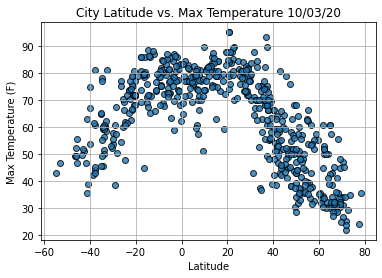

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

# 6.3.2 Plot Latitude vs. Humidity

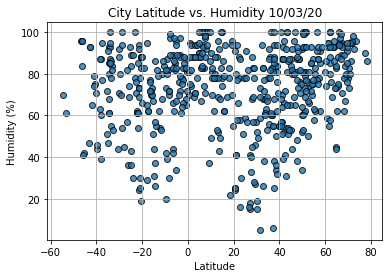

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

# 6.3.3 Plot Latitude vs. Cloudiness

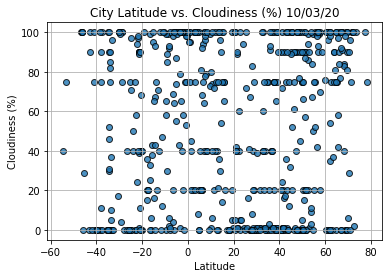

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

# 6.3.4 Plot Latitude vs. Wind Speed


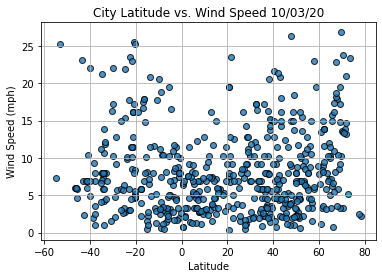

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

# 6.4.2 Find the Correlation Between Latitude and Maximum Temperature

In [20]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [21]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

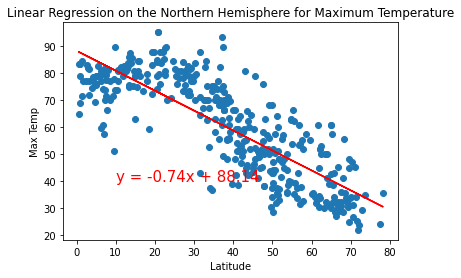

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

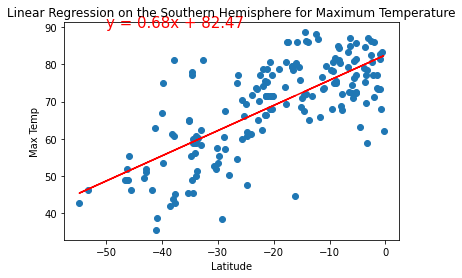

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

# 6.4.3 Find the Correlation Between Latitude and Percent Humidity

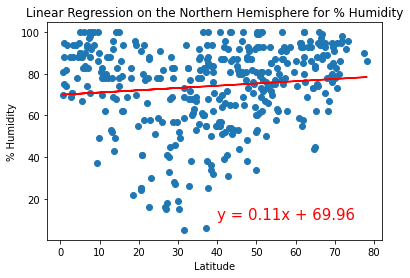

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

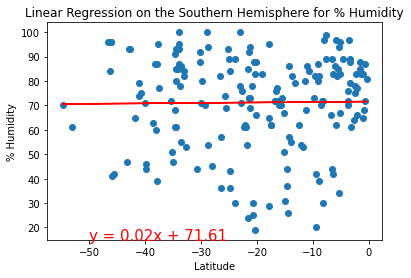

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

# 6.4.4 Find the Correlation Between Latitude and Percent Cloudiness

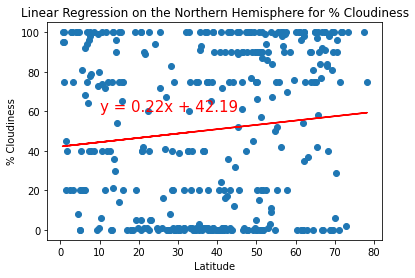

In [27]:
# Refactor the code we have been using for linear regression lines and plots to create the x- and y-values 
# for the percent cloudiness and latitudes on the Northern Hemisphere DataFrame.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the plot_linear_regression function with the correct arguments to create the linear regression line 
# and plot for percent cloudiness in the Northern Hemisphere. It should look like the following plot. 
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(10,60))

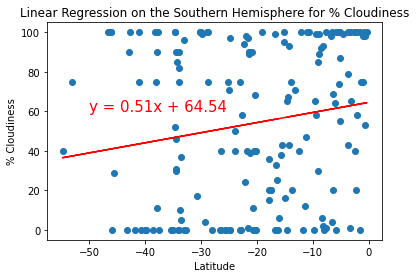

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

# 6.4.5 Find the Correlation Between Latitude and Wind Speed

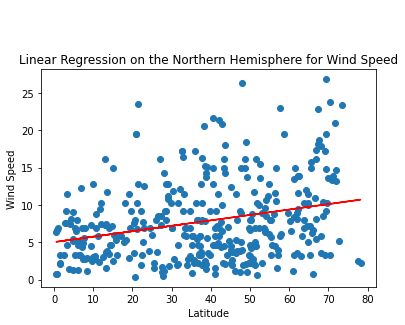

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

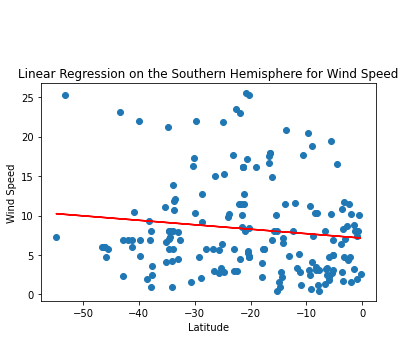

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))